In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt #Useful to include matplotlib when plotting with Seaborn, because Seaborn is built on it.
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math

steps = pd.read_csv('steps.csv', sep=";") #loading dataset from csv, had to separate data points by semicolon
survey = pd.read_csv('survey.csv')
steps.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df = pd.merge(steps, survey, on="id")
df = df[(df["weight"] < 180) & (df["weight"] > 35)] # removing impossible values
df.fillna(0) # filling nan with 0 so we can have an easy calculation
df

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,12-5-2014,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,1129.0,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,925,NaN,4571.0,10471.0,5899.0,15295.0,9178.0,9348.0,12229.0,13767.0,...,NaN,NaN,Lille,Female,45-54,3,4,Master or doctorate,165.0,59.0
925,926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Lille,Male,<25,3,5,Bachelor,192.0,90.0
926,927,NaN,NaN,NaN,1623.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Montpellier,Male,35-44,2,2,Bachelor,181.0,71.0
927,928,NaN,NaN,14411.0,14364.0,26629.0,13092.0,9266.0,14949.0,43238.0,...,NaN,NaN,Lille,Female,55-64,1,1,High school,172.0,65.0


In [7]:
# The handy Pandas function to_numeric converts non-numeric data to NaN. The last argument overrides the errors
# Python would normally generate
df['weight'] = df['weight'].apply(pd.to_numeric, errors='coerce')
df['height'] = df['height'].apply(pd.to_numeric, errors='coerce')

df['weight'] = df['weight'].apply(weight_func)

NameError: name 'weight_func' is not defined

In [8]:
mean = df.loc[:,'20-6-2013':'13-5-2014':1].mean(axis=1) #selecting only steps data to create a mean on axis=1 (horizontal)

In [9]:
df['mean'] = mean #making sure to have a column named mean

df = df[(df["mean"] < 20000)]

In [10]:
df

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight,mean
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,10205.521212
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,5687.423313
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,8301.729730
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,3633.200000
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,5312.129630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,925,NaN,4571.0,10471.0,5899.0,15295.0,9178.0,9348.0,12229.0,13767.0,...,NaN,Lille,Female,45-54,3,4,Master or doctorate,165.0,59.0,6282.131868
925,926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Lille,Male,<25,3,5,Bachelor,192.0,90.0,4799.880000
926,927,NaN,NaN,NaN,1623.0,NaN,NaN,NaN,NaN,NaN,...,NaN,Montpellier,Male,35-44,2,2,Bachelor,181.0,71.0,10030.326829
927,928,NaN,NaN,14411.0,14364.0,26629.0,13092.0,9266.0,14949.0,43238.0,...,NaN,Lille,Female,55-64,1,1,High school,172.0,65.0,15679.679012


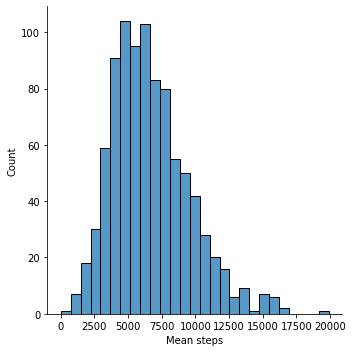

The mean is 6654.303064790857
The median is 6236.363047619048
The variance is 8103681.113501692


In [11]:
median_steps = df["mean"].median()
mean_steps = df["mean"].mean()
variance_steps = df["mean"].var()

sns.displot(df["mean"], kde=False)
plt.xlabel("Mean steps")
plt.show()

print("The mean is " + str(mean_steps))
print("The median is " + str(median_steps))
print("The variance is " + str(variance_steps))

C:\Users\maksz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


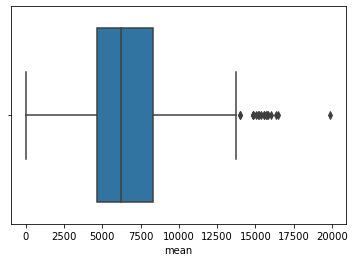

In [12]:
sns.boxplot(df["mean"])
plt.show()

We can see that the mean of steps is mostly in the area of 4000 to 8500 steps. This gives an emphsis that the distribution is right skewed. There are some outliers in the area 13000 to 17000 steps which points out again that the distribution is right skewed. 

Assignment 2: correlation

sns.pairplot(df)
plt.show() #using Matplotlib to show the plot

<AxesSubplot:xlabel='weight', ylabel='mean'>

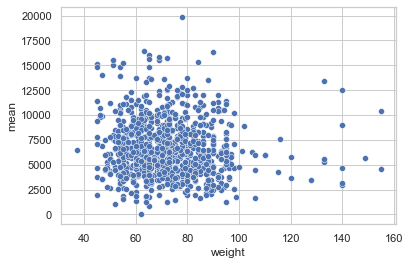

In [13]:
sns.set(style="whitegrid")
sns.scatterplot(x=df["weight"],
                y=df["mean"],
                data=df)

<AxesSubplot:xlabel='height', ylabel='mean'>

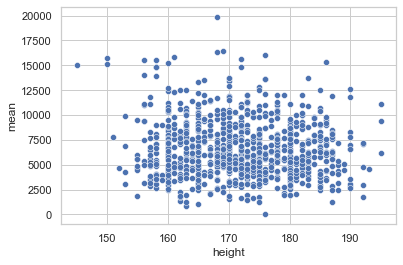

In [14]:
sns.set(style="whitegrid")
sns.scatterplot(x=df["height"],
                y=df["mean"],
                data=df)

<AxesSubplot:xlabel='hh_size', ylabel='mean'>

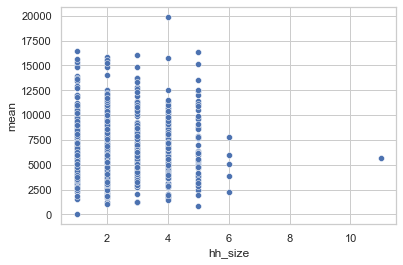

In [15]:
sns.set(style="whitegrid")
sns.scatterplot(x=df["hh_size"],
                y=df["mean"],
                data=df)

<AxesSubplot:xlabel='height', ylabel='weight'>

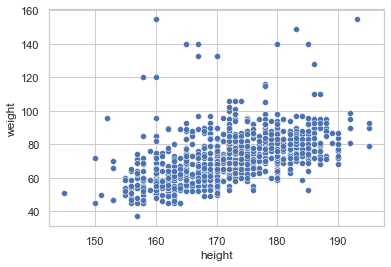

In [16]:
sns.set(style="whitegrid")
sns.scatterplot(x=df["height"],
                y=df["weight"],
                data=df)

In [17]:
num = df[["height", "weight", "hh_size", "mean"]]
num.corr()

,height,weight,hh_size,mean
height,1.000000,0.511104,-0.048103,-0.075714
weight,0.511104,1.000000,0.006995,-0.065072
hh_size,-0.048103,0.006995,1.000000,0.031288
mean,-0.075714,-0.065072,0.031288,1.000000


From the scatterplots and table we can see that tere is a moderate correlation between weight and height (p= 0.51). All the other correlations are super low/none or even negative. 

Assignment 3: Linear Regression

Linear regresion is a form of predicting one value (dependent) based on another (independent). 

In [18]:
dummy = df[["gender", "age", "education_1"]] #Creating dummy variables for the categorical variables
dum = pd.get_dummies(dummy)
dum.head(10)

,gender_Female,gender_Male,age_25-34,age_35-44,age_45-54,age_55-64,age_65+,age_<25,education_1_Bachelor,education_1_High school,education_1_Master or doctorate,education_1_No degree,education_1_Primary,education_1_Vocational
0,0,1,1,0,0,0,0,0,0,0,1,0,0,0
1,0,1,0,1,0,0,0,0,1,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,1,0,0,0,0,0
4,1,0,1,0,0,0,0,0,1,0,0,0,0,0
5,0,1,0,1,0,0,0,0,0,0,0,0,0,1
6,0,1,1,0,0,0,0,0,0,0,1,0,0,0
7,1,0,1,0,0,0,0,0,0,0,1,0,0,0
8,1,0,0,1,0,0,0,0,0,0,0,0,0,1
9,1,0,1,0,0,0,0,0,0,0,1,0,0,0


In [19]:
from sklearn.linear_model import LinearRegression #we need this specific model from sk-learn

#To use sk-learn, we need to create lists of the two variables
#Note that you need to use [[ ]] with x. This creates a Pandas Data Frame (table), rather than a Pandas Series (list).
#lm.fit needs a Data Frame (or matrix) for x, because x can be multiple variables
x = dum 
y = df['mean']
lm = LinearRegression() #this creates a new LR model
lm.fit(x, y) #this "fits" the model

b0 = lm.intercept_ #gets the intercept
b1 = lm.coef_[0] #lm.coef_ gets a list of coefficients (excluding the intercept). [0] gets the actual number from the list

print(f"The regression line is equal to y = {b0:.3f} + {b1:.3f}X") #.0f formats to 3 decimals. 

The regression line is equal to y = 6428.313 + 138.731X


$y = 6428.313 + 138.731X$

In [20]:
df['mean_p'] = lm.predict(x) #using built-in predict() method to generate predictions of mean, stored in original dataframe
df.head(10)

C:\Users\maksz\AppData\Local\Temp/ipykernel_5480/126366733.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mean_p'] = lm.predict(x) #using built-in predict() method to generate predictions of mean, stored in original dataframe


,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,city,gender,age,hh_size,education,education_1,height,weight,mean,mean_p
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,10205.521212,6340.306133
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,5687.423313,7012.954879
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,8301.729730,6340.306133
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,3633.200000,5720.231872
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,5312.129630,6620.085649
5,6,NaN,16924.0,14411.0,5121.0,29784.0,8995.0,23336.0,15.0,17075.0,...,Lille,Male,35-44,1,1,Vocational,170.0,63.0,11908.509804,5601.515224
6,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Montpellier,Male,25-34,2,2,Master or doctorate,175.0,75.0,4715.400000,6340.306133
7,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Bordeaux,Female,25-34,3,4,Master or doctorate,165.0,88.0,3594.051724,6617.767988
8,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Lille,Female,35-44,4,4,Vocational,172.0,69.0,8626.707965,5878.977079
9,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1964.0,...,Lille,Female,25-34,2,2,Master or doctorate,165.0,93.0,3787.043478,6617.767988


In [21]:
df["resid"] = df["mean"] - df["mean_p"]#get the residuals by subtracting the prediction from the actual views
df.head()

C:\Users\maksz\AppData\Local\Temp/ipykernel_5480/1399035927.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["resid"] = df["mean"] - df["mean_p"]


,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,gender,age,hh_size,education,education_1,height,weight,mean,mean_p,resid
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,Male,25-34,4,4,Master or doctorate,178.0,98.0,10205.521212,6340.306133,3865.215079
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,Male,35-44,1,3,Bachelor,180.0,77.0,5687.423313,7012.954879,-1325.531566
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,Male,25-34,2,2,Master or doctorate,180.0,83.0,8301.729730,6340.306133,1961.423596
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Male,<25,1,1,Bachelor,178.0,80.0,3633.200000,5720.231872,-2087.031872
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Female,25-34,3,4,Bachelor,167.0,61.0,5312.129630,6620.085649,-1307.956020


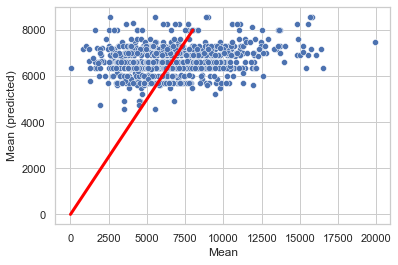

In [33]:
sns.scatterplot(x='mean',y='mean_p',data=df)
plt.plot([0, 8000], [0, 8000], color='red', lw=3) #This draws the straight red line, you can leave this out if you wish
plt.xlabel('Mean')
plt.ylabel('Mean (predicted)')
plt.show()

The model overshoots a lot both ways predicts too high for low number of mean steps, and predicts too low for high numbers of mean steps

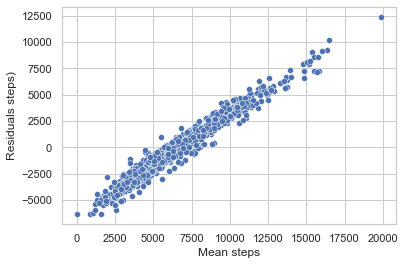

In [29]:
sns.scatterplot(x='mean',y='resid',data=df)
plt.xlabel('Mean steps')
plt.ylabel('Residuals steps)')
plt.show()


The bigger mean steps value the more residuals (straight growing line)

In [36]:
r2_score(df['mean'], df['mean_p']) #this gives the model fit (R2) for the Y and predicted Y

0.044842304584963966

The R^2 is ~0.05, which means 5% of the variation in views is explained by the model. That's not really good...

In [39]:
math.sqrt(mean_squared_error(df['mean'], df['mean_p'])) #this gives the model fit (R2) for the Y and predicted Y

2780.6159001981378

The RMSE is 2780. Which means that we are typically about 2780 off in our predicted steps.